### Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

### Content
You own a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

### Inspiration
By the end of this case study , you would be able to answer below questions.

1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python in simplest way.

2- Who are your target customers with whom you can start marketing strategy [easy to converse]

3- How the marketing strategy works in real world

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import os

In [4]:
os.getcwd()

'/home/ec2-user/SageMaker'

### Read CSV from AWS S3

In [5]:
import boto3

In [6]:
client = boto3.client('s3')

In [7]:
path = 's3://classdataset/mall_customers.csv'

In [8]:
df = pd.read_csv(path)

In [9]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


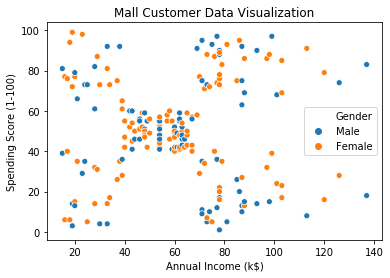

In [14]:
_ = sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender")
_ = plt.xlabel('Annual Income (k$)')
_ = plt.ylabel('Spending Score (1-100)')
_ = plt.title('Mall Customer Data Visualization')
plt.show()

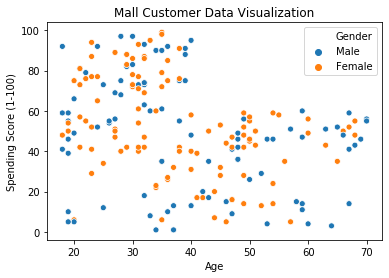

In [15]:
_ = sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Gender")
_ = plt.xlabel('Age')
_ = plt.ylabel('Spending Score (1-100)')
_ = plt.title('Mall Customer Data Visualization')
plt.show()

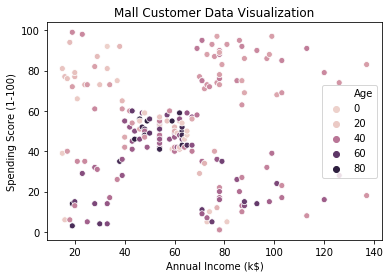

In [16]:
_ = sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Age")
_ = plt.xlabel('Annual Income (k$)')
_ = plt.ylabel('Spending Score (1-100)')
_ = plt.title('Mall Customer Data Visualization')
plt.show()

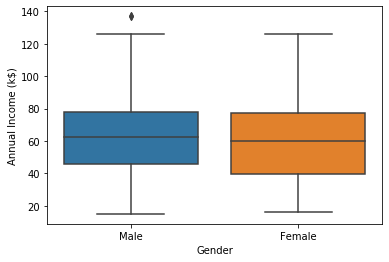

In [17]:
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)')

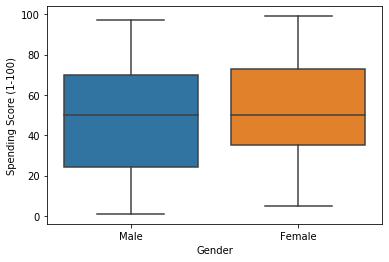

In [18]:
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)')

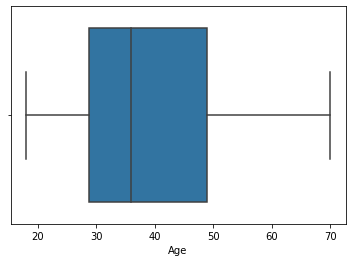

In [19]:
sns.boxplot(data=df, x='Age')

In [20]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x)
labels = kmeans.predict(x)
print(labels)

[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 4 2 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 1 3 4 3 1 3 1 3 4 3 1 3 1 3 1 3 1 3 4 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [22]:
xs = df['Annual Income (k$)'].values
ys = df['Spending Score (1-100)'].values

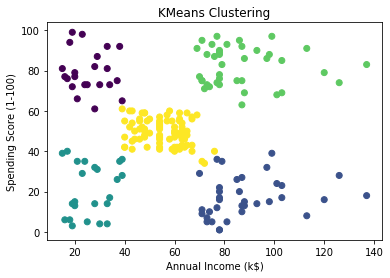

In [23]:
_ = plt.scatter(xs, ys, c=labels)
_ = plt.xlabel('Annual Income (k$)')
_ = plt.ylabel('Spending Score (1-100)')
_ = plt.title('KMeans Clustering')
plt.show()

In [24]:
# cross-validation
inertia=[]
ks=range(1,10)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

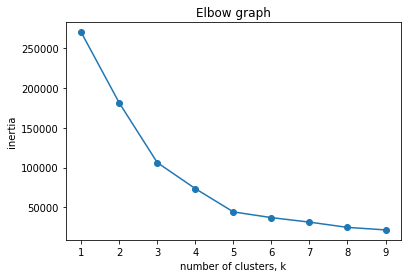

In [25]:
# Plot ks vs inertias
_ = plt.plot(ks, inertia, '-o')
_ = plt.xlabel('number of clusters, k')
_ = plt.ylabel('inertia')
_ = plt.title('Elbow graph')
_ = plt.xticks(ks)
plt.show()